# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
previsao_renda = pd.read_csv('previsao_de_renda.csv')
previsao_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [10]:
previsao_renda.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [18]:
var_quant = previsao_renda[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']] 
var_quant.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


C:\Users\Eric\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


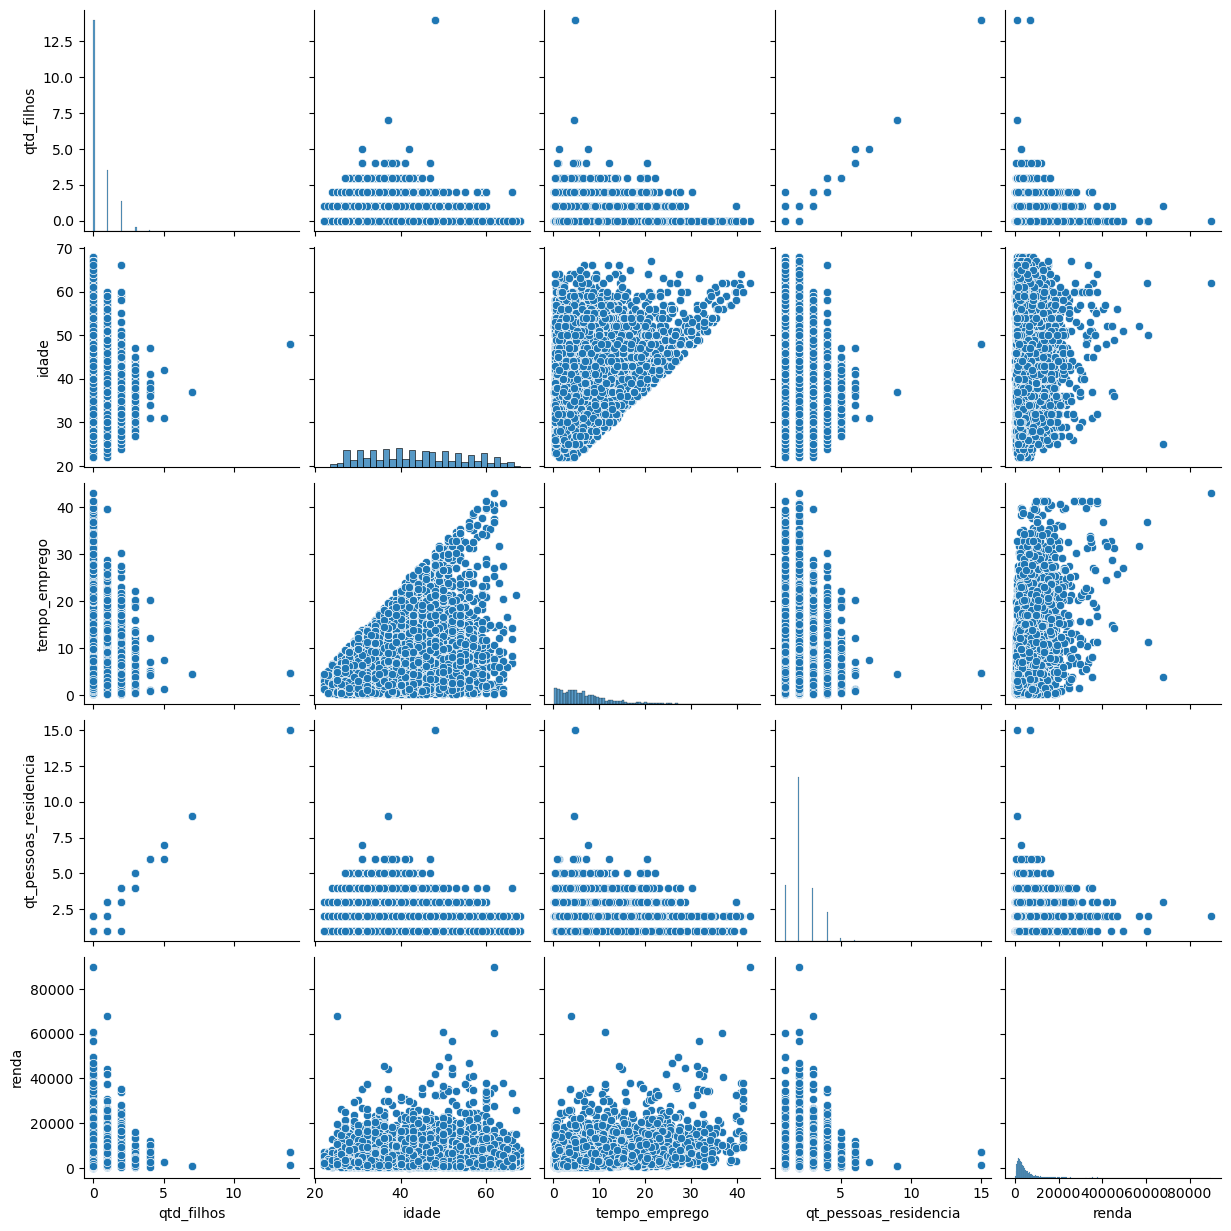

In [21]:
sns.pairplot(var_quant)

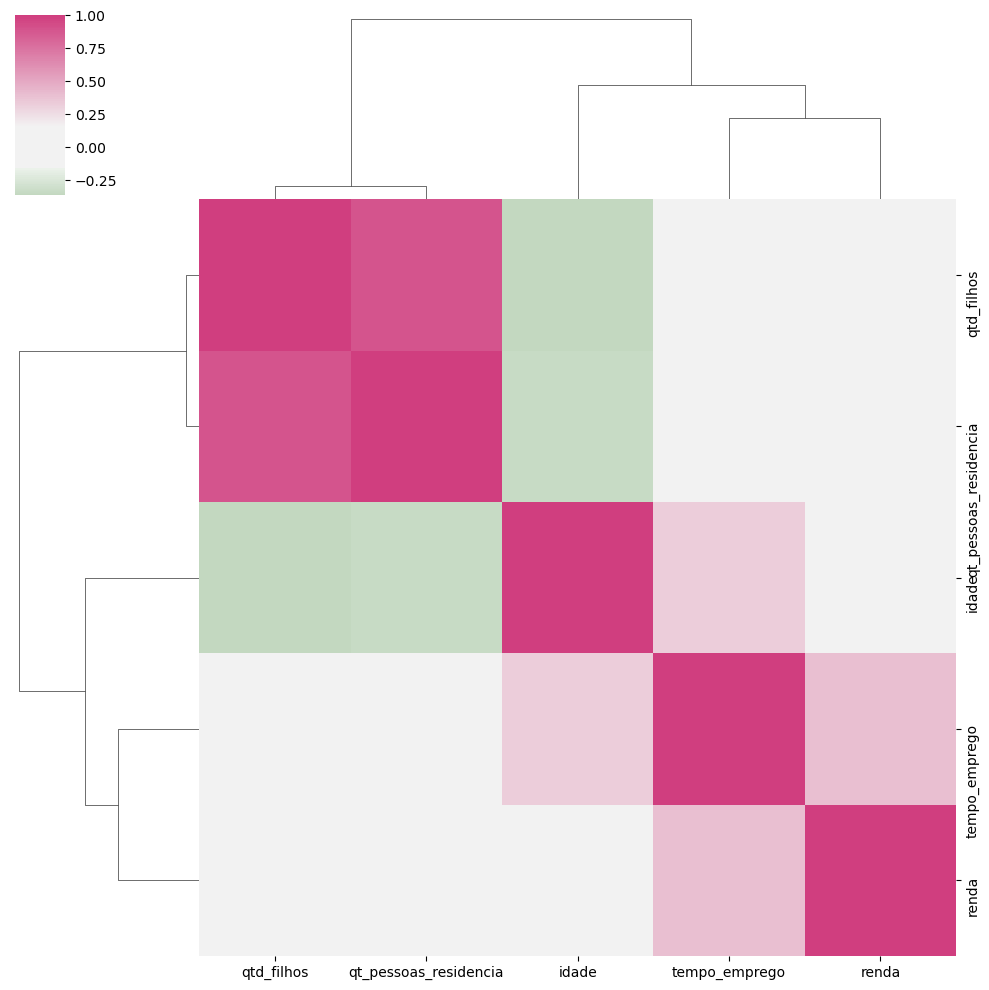

In [30]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 40, center = 'light')



sns.clustermap(var_quant.corr(), figsize=(10, 10), center = 0, cmap=cmap)


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

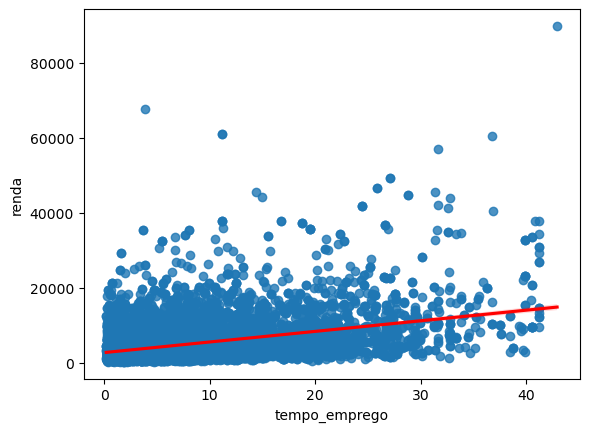

In [46]:
_ = sns.regplot(x='tempo_emprego', y='renda', data = var_quant_log, line_kws={'color': 'red'})

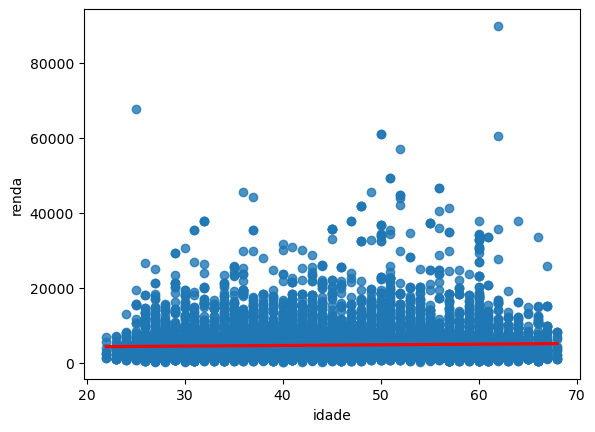

In [47]:
_ = sns.regplot(x='idade', y='renda', data = var_quant_log, line_kws={'color': 'red'})

3) Na su aopinião, há outliers na variável renda?

Tem pontos isolados, mas não acho que devem ser tratados, pois quando falamos em renda há pessoas que ganham muito e conseguem isso mais jovens e/ou com pouco tempo de emprego, apesar de serem poucas.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

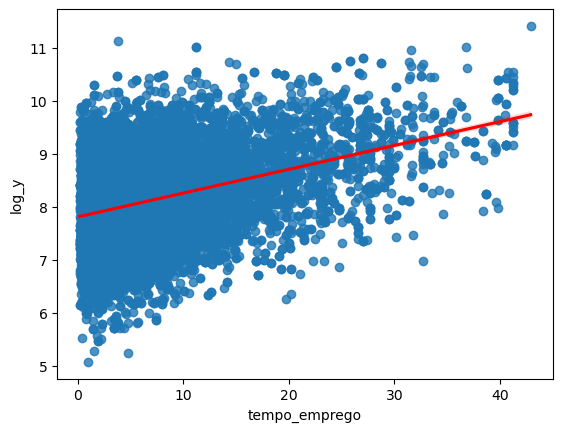

In [56]:
var_quant_log = var_quant.copy()
var_quant_log['log_y'] = np.log(var_quant_log['renda'])

_ = sns.regplot(x='tempo_emprego', y='log_y', data = var_quant_log, line_kws={'color': 'red'})


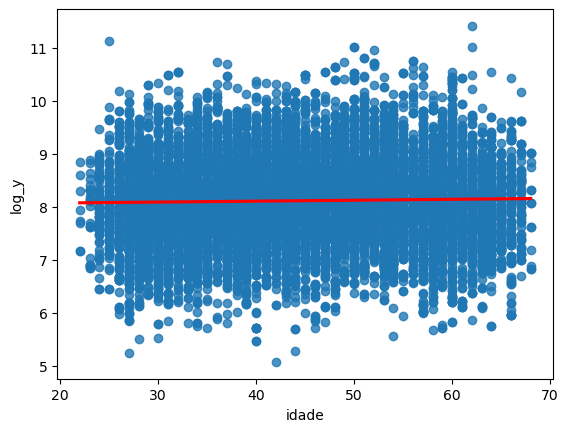

In [45]:
var_quant_log = var_quant.copy()
var_quant_log['log_y'] = np.log(var_quant_log['renda'])

_ = sns.regplot(x='idade', y='log_y', data = var_quant_log, line_kws={'color': 'red'})

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
Para o tempo de emprego ficou mais clara a análise, mas para idade a correlação ainda fica difícil de ser percebida.